In [ ]:
class_names = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', '$', '#']

In [ ]:
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')

# Loading Training Data
X_train = np.load('data_train.npy').T
t_train = np.load('labels_train.npy')

print(X_train.shape, t_train.shape)

(6720, 90000) (6720,)


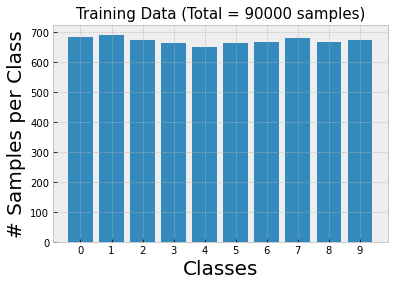

In [ ]:
# Counting number samples per class
vals, counts = np.unique(t_train, return_counts=True)

plt.bar(vals, counts)
plt.xticks(range(10),range(10))
plt.xlabel('Classes',size=20)
plt.ylabel('# Samples per Class', size=20)
plt.title('Training Data (Total = '+str(X_train.shape[1])+' samples)',size=15);

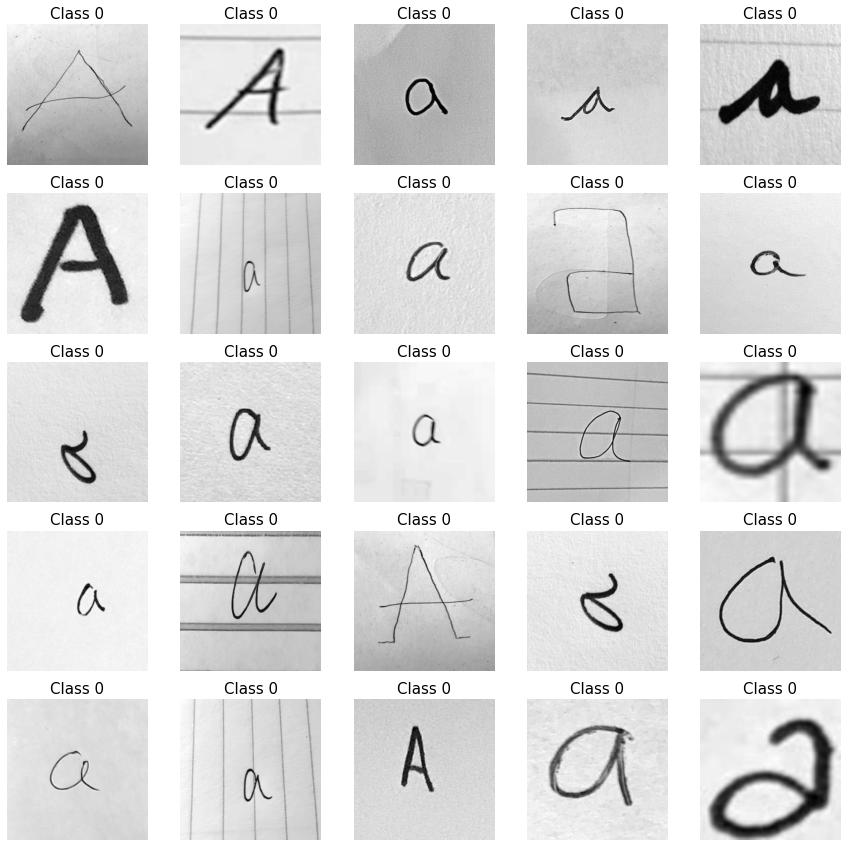

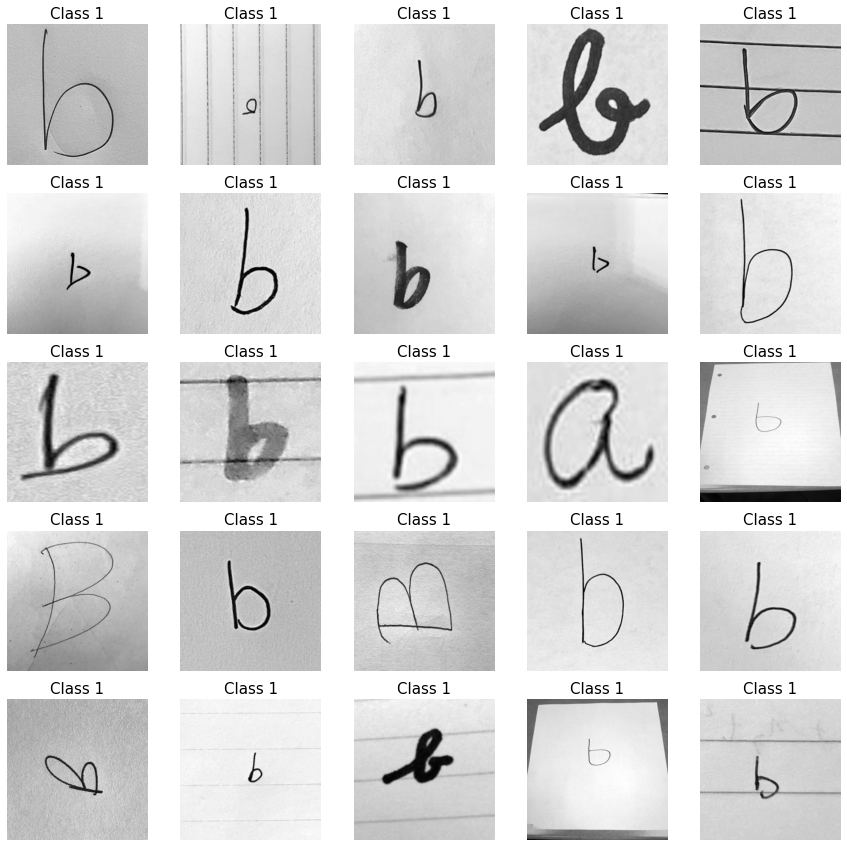

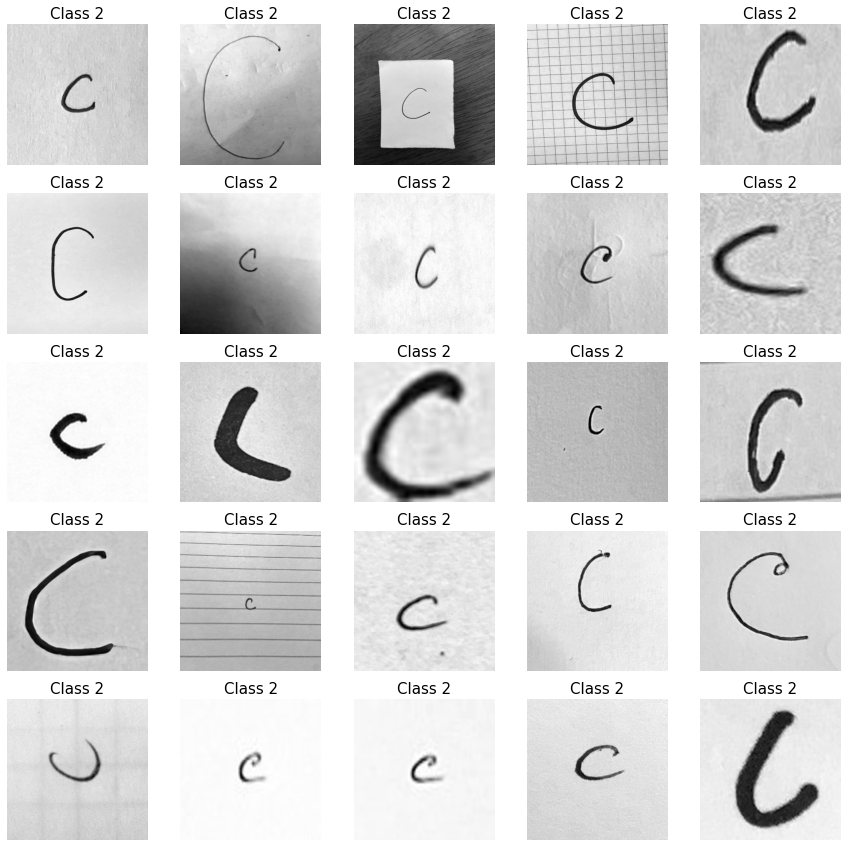

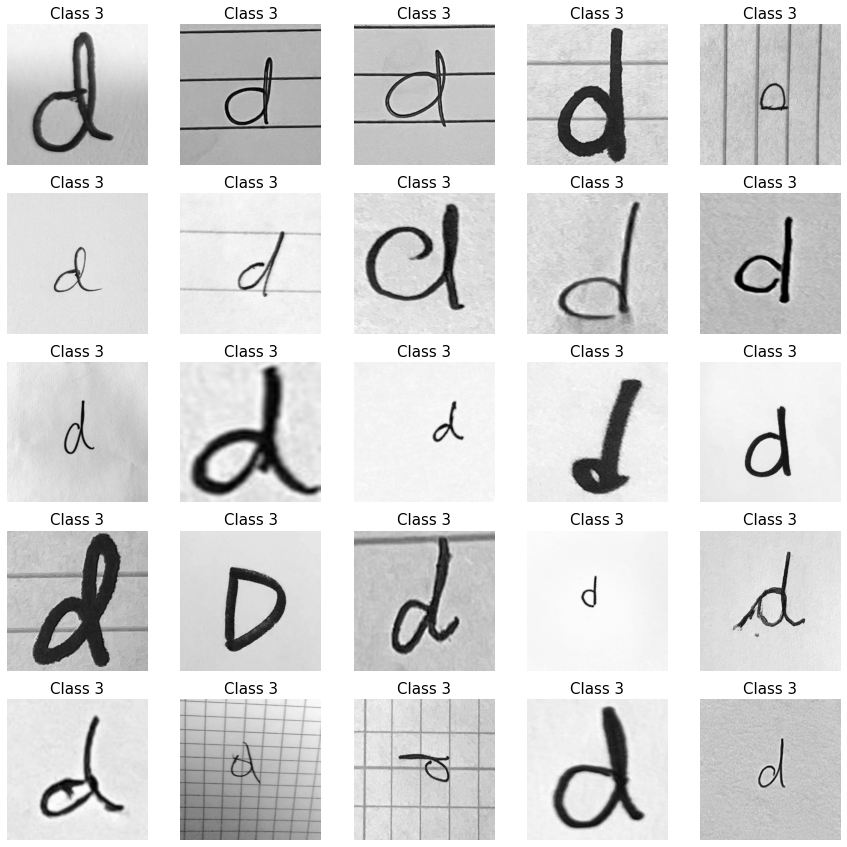

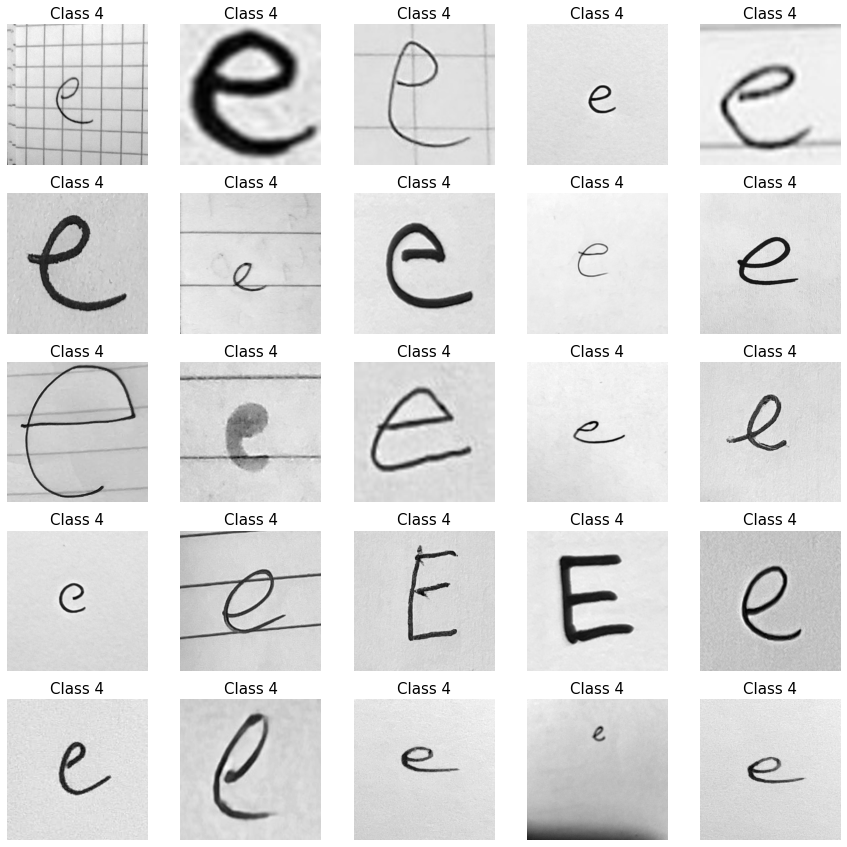

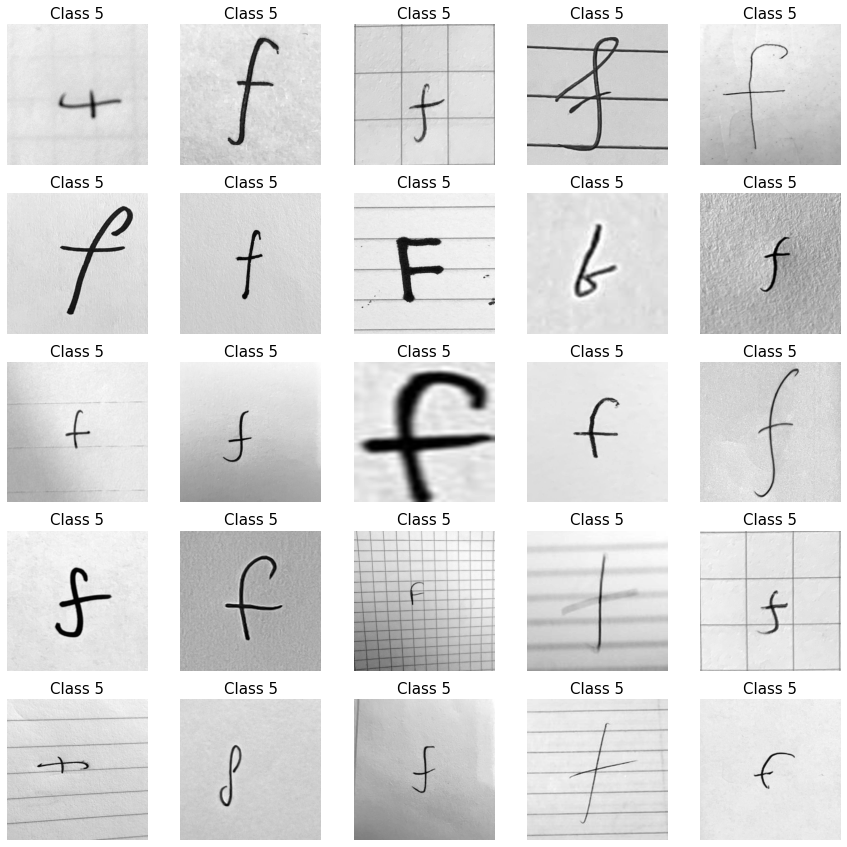

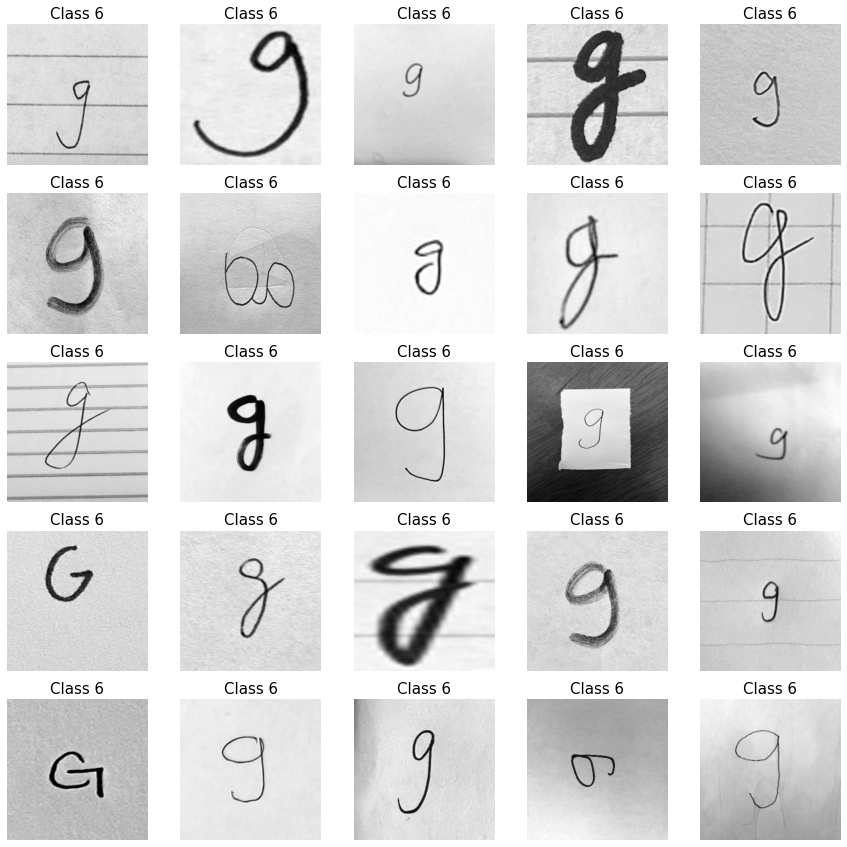

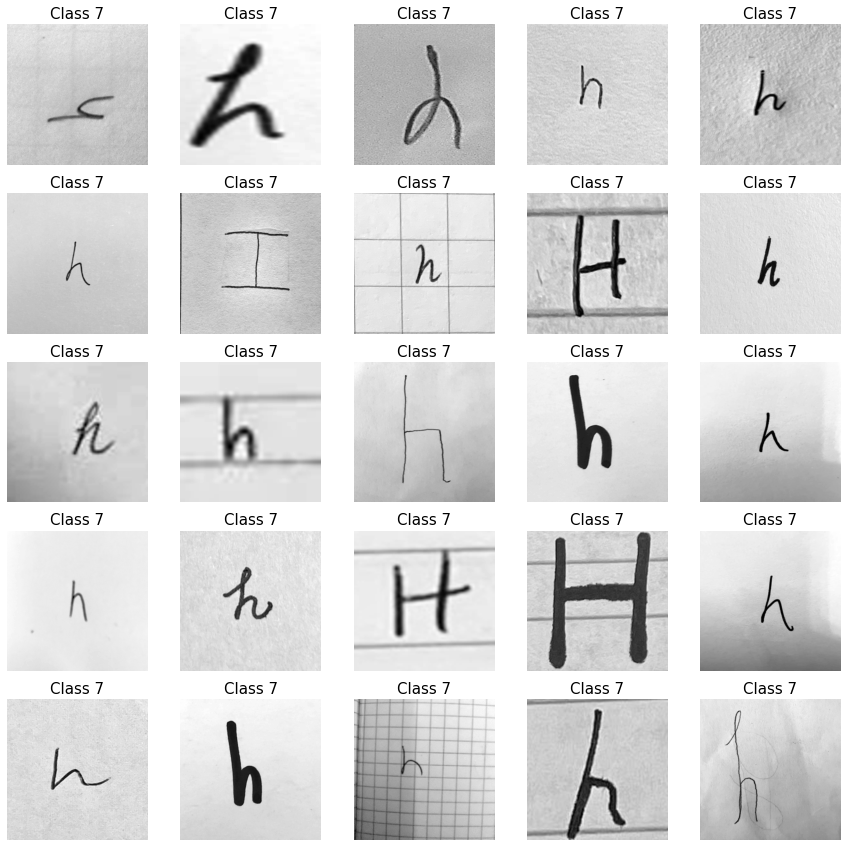

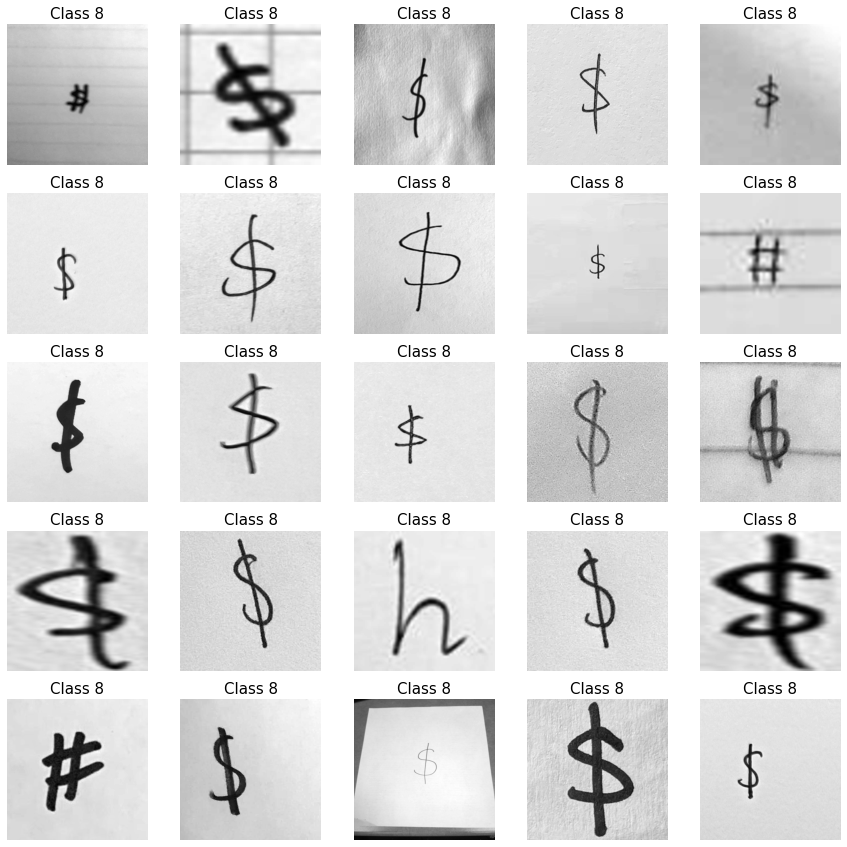

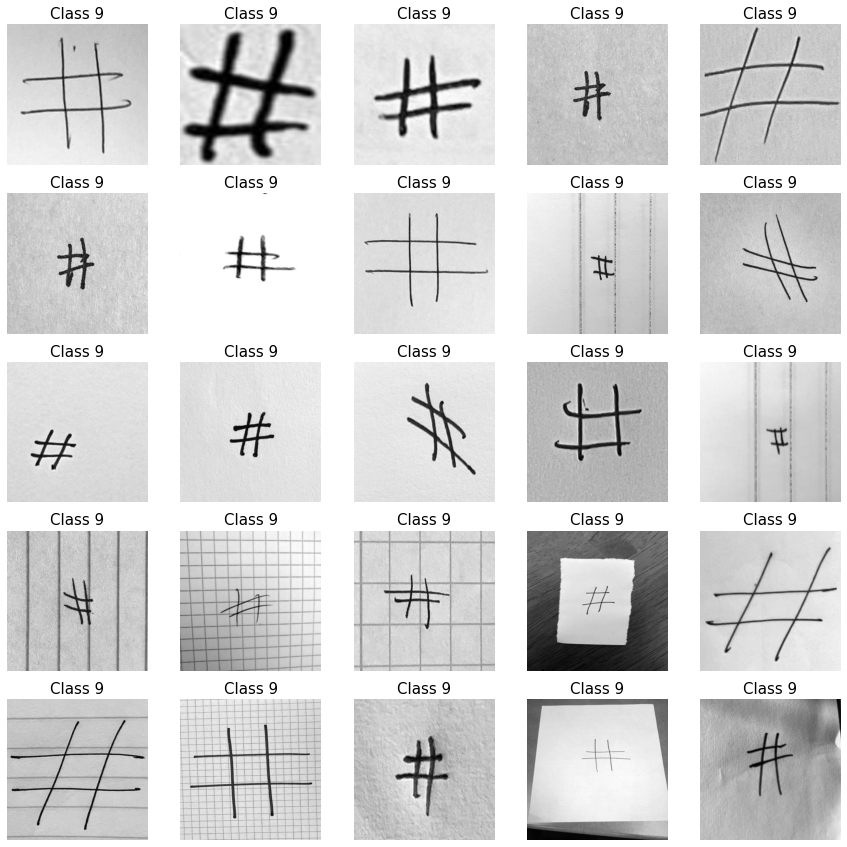

In [ ]:
# Displaying some random examples per class

for i in range(0,10):
    rnd_sample = npr.permutation(np.where(t_train==i)[0])
    fig=plt.figure(figsize=(15,15))
    for j in range(25):
        fig.add_subplot(5,5,j+1)
        plt.imshow(X_train[rnd_sample[j],:].reshape((300,300)),cmap='gray')
        plt.axis('off');plt.title('Class '+str(int(t_train[rnd_sample[j]])),size=15)
    plt.show()
    print('\n\n')

Implement Recursive Feature Elimination (RFE) to select the subset of features. Experiment with at least 2 different estimators.

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

from scipy import stats
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings("ignore")

In [ ]:
from PIL import Image

X_train_prep = np.empty((len(X_train),28*28))
for image in range(len(X_train)):
  X_train_prep[image] = np.reshape(Image.fromarray(X_train[image].reshape(300,300)).resize((28,28)), (784,))

X_train.shape, X_train_prep.shape

((6720, 90000), (6720, 784))

In [ ]:
X_train_scaled = MinMaxScaler().fit_transform(X_train_prep)

In [ ]:
# estimator 1: LogReg
lr = LogisticRegression()
pipe = Pipeline([('MinMax', MinMaxScaler()),
                ('log_reg', LogisticRegression())])

# pipe.fit(X_train, t_train)

rfe = RFE(estimator=lr)
rfe.fit(X_train_scaled, t_train)

RFE(estimator=LogisticRegression())

In [ ]:
# print(rfe.support_)
print(rfe.ranking_)

[306 391 360  63 325  31 259 253 203 357 302 347 361 379 388 384 350 161
 232 299 333 194 227 282 275 100   1   1  77 167 208 240 133   1   1  17
 149 313 276 272 188 262 244 178   8  44 122 290 359 257 374 335 319 261
 144  37 128 229 295 297  93   1   1   1   1 107 292 252 164   1 125   1
   1   1  68 224 317 281 339 209 187 136   1   1 192 283 248 291 137   1
   1   1  65 206 346  51   1   1  15   1 147   1   1 101   4 182 371 269
 362 157   1  86 237 327 230 212 115   1   1   1   1 102  67   1   1   1
  91  58   1   1   1   1 126 156 308 366 298 183   1   9 341 364 265 180
  61   1   1   1   1   1   1   2  62 134 202   1   1   1 120   1   1  80
 201 138 338 340  46 110 375 376 197  96   1  76   1   1   1   1   1   1
   1  90   1   1   1   1  48   1   1   1  24 217 393 381  54 177 373 387
 320 226  33 172   1   1   1   1   1   1   1  43   1   1   1  74   1   1
   1 135 173 304 337 342   1 198 310 389 301 321 241 154   1  71 176  29
   1   1   1   1   1   1   1   1   1  30   1   1 12

In [ ]:
import joblib

joblib.dump(rfe, 'rfe_log_reg.pkl')

['rfe_log_reg.pkl']

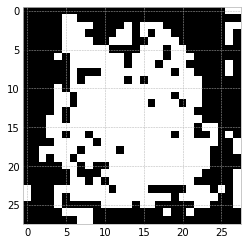

In [ ]:
plt.imshow(abs(rfe.support_.reshape(28,28)),cmap='gray')


As seen from the above mask, the selected pixels are generally located in the center of the input image. Even though the resolution is low, the conecentration of pixels at the center describe the image being classified.

In [ ]:
# estimator 2: Lasso
l1 = Lasso()
pipe_svm = Pipeline([('MinMax', MinMaxScaler()),
                ('svc', Lasso())])

rfe_l1 = RFE(estimator=l1)
rfe_l1.fit(X_train_scaled, t_train)

RFE(estimator=Lasso())

In [ ]:
# print(rfe_svm.support_)
print(rfe_l1.ranking_)

[393 392 391 390 389 388 387 386 385 384 383 382 381 380 379 378 377 376
 375 374 373 372 371 370 369 368 367 366 365 364 363 362 361 360 359 358
 357 356 355 354 353 352 351 350 349 348 347 346 345 344 343 342 341 340
 339 338 337 336 335 334 333 332 331 330 329 328 327 326 325 324 323 322
 321 320 319 318 317 316 315 314 313 312 311 310 309 308 307 306 305 304
 303 302 301 300 299 298 297 296 295 294 293 292 291 290 289 288 287 286
 285 284 283 282 281 280 279 278 277 276 275 274 273 272 271 270 269 268
 267 266 265 264 263 262 261 260 259 258 257 256 255 254 253 252 251 250
 249 248 247 246 245 244 243 242 241 240 239 238 237 236 235 234 233 232
 231 230 229 228 227 226 225 224 223 222 221 220 219 218 217 216 215 214
 213 212 211 210 209 208 207 206 205 204 203 202 201 200 199 198 197 196
 195 194 193 192 191 190 189 188 187 186 185 184 183 182 181 180 179 178
 177 176 175 174 173 172 171 170 169 168 167 166 165 164 163 162 161 160
 159 158 157 156 155 154 153 152 151 150 149 148 14

In [ ]:
joblib.dump(rfe_l1, 'rfe_l1.pkl')

['rfe_l1.pkl']

In [ ]:
plt.imshow(abs(rfe_l1.support_.reshape(300,300)),cmap='gray')

PCA to explain 90% of the variance, train a classifier on the original dataset, then one on the reduced one, compare training time, performance, visualize top 10 eigenvectors, reconstruct images from PCA projections

In [ ]:
pipe = Pipeline([('STD', MinMaxScaler()), #Convert all values to either White or Black
                ('PCA', PCA(n_components=150))])

pipe.fit_transform(X_train_prep)
np.where(np.cumsum(pipe.named_steps['PCA'].explained_variance_ratio_)>=0.9)

(array([ 50,  51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,
         63,  64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,
         76,  77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,
         89,  90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101,
        102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114,
        115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127,
        128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140,
        141, 142, 143, 144, 145, 146, 147, 148, 149]),)

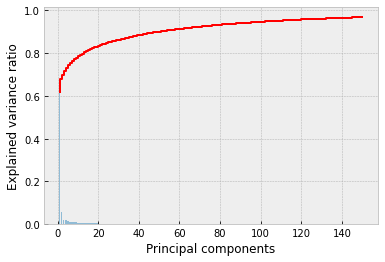

In [ ]:
plt.step(range(1,151),np.cumsum(pipe.named_steps['PCA'].explained_variance_ratio_),c='r')
plt.bar(range(1,151),pipe.named_steps['PCA'].explained_variance_ratio_, alpha=0.5)
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components');

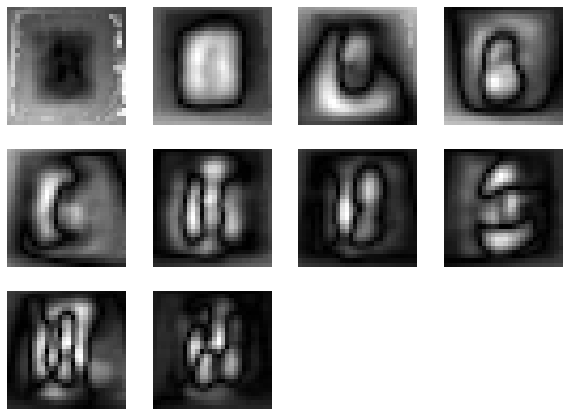

In [ ]:
n_components = 10

pca = PCA(n_components=n_components)
ypca = pca.fit_transform(X_train_scaled)

fig=plt.figure(figsize=(10,10))
for i in range(n_components):
    fig.add_subplot(4,4,i+1)
    plt.imshow(abs(pca.components_[i,:].reshape(28,28)),cmap='gray')
    plt.axis('off')

These 10 eigenvectors represent larger details abstracted from the pictures. The seem to focus on the center regions containing the characters themselves.

In [ ]:
pca = PCA(n_components=50)
ypca = pca.fit_transform(X_train_scaled)
X_reconstruct_skl = pca.inverse_transform(ypca)

X_reconstruct_skl.shape

(6720, 784)

In [ ]:
# Covariance matrix for training data
K = np.cov(X_train_scaled.T) # np.cov() expects the input to be DxN matrix

# Eigendecomposition
L, U = np.linalg.eigh(K)

L

array([5.54304751e-06, 5.65619243e-06, 6.03177301e-06, 6.21775744e-06,
       6.69896814e-06, 6.82009825e-06, 7.08507295e-06, 7.37172762e-06,
       7.39680047e-06, 7.65145361e-06, 8.04857633e-06, 8.16362835e-06,
       8.58411193e-06, 8.63831399e-06, 8.97140904e-06, 9.23402735e-06,
       9.28326006e-06, 9.45017076e-06, 9.71748874e-06, 1.03319408e-05,
       1.05564197e-05, 1.06420557e-05, 1.09753023e-05, 1.10338423e-05,
       1.12094814e-05, 1.15905093e-05, 1.16566797e-05, 1.20830798e-05,
       1.21995229e-05, 1.24921632e-05, 1.27546946e-05, 1.28868870e-05,
       1.30639005e-05, 1.33348641e-05, 1.37344724e-05, 1.39949441e-05,
       1.44558789e-05, 1.45561811e-05, 1.46508779e-05, 1.50296907e-05,
       1.51109425e-05, 1.55228448e-05, 1.56031312e-05, 1.59624981e-05,
       1.61144972e-05, 1.64253051e-05, 1.67031076e-05, 1.69361351e-05,
       1.71981292e-05, 1.73685549e-05, 1.76510324e-05, 1.79447866e-05,
       1.80800365e-05, 1.82909283e-05, 1.88138163e-05, 1.89544440e-05,
      

In [ ]:
U = U[:,::-1] # Flipping order of eigenvectors

L = np.diag(L[::-1]) # Flip the eigenvalues and construct a diagonal matrix

In [ ]:
N_eigenvectors = 86

# Projection/Transformation matrix
P = U[:,:N_eigenvectors]

# PCA project
X_proj = X_train_scaled@P

# Reconstructing the original images using only 9 eigenvectors
X_reconstruct = X_proj@np.linalg.pinv(P)

X_reconstruct.shape

(6720, 784)

In [ ]:
scaler = MinMaxScaler().fit(X_train_prep)
X_reconstructed = scaler.inverse_transform(X_reconstruct)

X_reconstructed_skl = scaler.inverse_transform(X_reconstruct_skl)

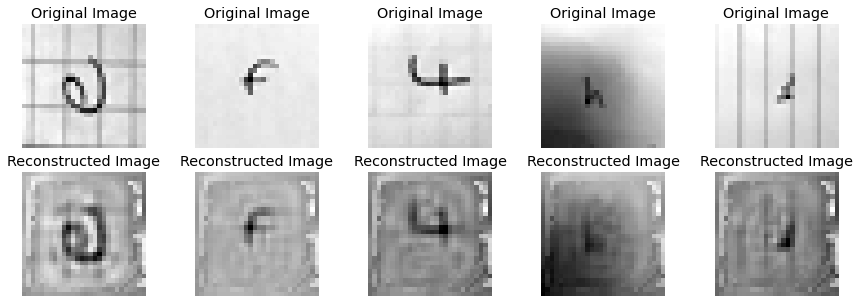

In [ ]:
N = 5
idx = np.random.choice(range(X_reconstructed.shape[0]),replace=False,size=N)

fig = plt.figure(figsize=(15,5))

j=1
for i in range(N):
    fig.add_subplot(2,N,j)
    plt.imshow(X_train_prep[idx[i],:].reshape(28,28), cmap='gray')
    plt.axis('off')
    plt.title('Original Image');

    fig.add_subplot(2,N,j+N)
    plt.imshow(X_reconstructed[idx[i],:].reshape(28,28), cmap='gray')
    plt.axis('off')
    plt.title('Reconstructed Image');
    j+=1

Above are 5 images and 5 reconstructions using PCA projections

In [ ]:
pipe1 = Pipeline(steps=[('STD', MinMaxScaler()),
                      ('PCA', PCA(n_components=50)),
                      ('SVM', SVC(kernel='rbf', class_weight='balanced'))])

pipe2 = Pipeline(steps=[('STD', MinMaxScaler()),
                      ('SVM', SVC(kernel='rbf', class_weight='balanced'))])

In [ ]:
from time import time

param_grid = dict(SVM__C=[10, 50],
                  SVM__gamma=[0.001, 0.005])

grid1 = GridSearchCV(pipe1, param_grid, refit=True,
                         n_jobs=-1)

t0 = time()
grid1.fit(X_train_prep, t_train)
t1 = time()
print("Full data set: %.2g sec" % (t1 - t0))
print(grid1.best_params_)
final_model1 = grid1.best_estimator_

Full data set: 83 sec
{'SVM__C': 50, 'SVM__gamma': 0.005}


In [ ]:
joblib.dump(final_model1, 'svm_PCA.pkl')

['svm_PCA.pkl']

In [ ]:
scores = cross_val_score(final_model1, X_train_prep, t_train,
                        scoring='accuracy',
                        cv=5)

confidence = 0.95
stats.t.interval(confidence,
                 len(scores)-1,
                 loc = scores.mean(),
                 scale=scores.std(ddof=1)/np.sqrt(len(scores)))

(0.46524320540670056, 0.4948758422123471)

In [ ]:
y_train = final_model1.predict(X_train_prep)
# y_test = final_model1.predict(X_test)
print('Accuracy in Training:', accuracy_score(t_train, y_train)*100,'%\n')
# print('Accuracy in Test:', accuracy_score(t_test, y_test)*100,'%')

Accuracy in Training: 55.550595238095234 %



In [ ]:
param_grid2 = dict(SVM__C=[10, 50],
                  SVM__gamma=[0.001, 0.005])

grid2 = GridSearchCV(pipe2, param_grid2, refit=True,
                         n_jobs=-1)

t0 = time()
grid2.fit(X_train_prep, t_train)
t1 = time()
print("Full data set: %.2g sec" % (t1 - t0))
print(grid2.best_params_)
final_model2 = grid2.best_estimator_

Full data set: 4.7e+02 sec
{'SVM__C': 50, 'SVM__gamma': 0.005}


In [ ]:
joblib.dump(final_model2, 'svm.pkl')

['svm.pkl']

In [ ]:
scores = cross_val_score(final_model2, X_train_prep, t_train,
                        scoring='accuracy',
                        cv=5)

confidence = 0.95
stats.t.interval(confidence,
                 len(scores)-1,
                 loc = scores.mean(),
                 scale=scores.std(ddof=1)/np.sqrt(len(scores)))

(0.4493172544376277, 0.5066351265147533)

In [ ]:
y_train = final_model2.predict(X_train_prep)

print('Accuracy in Training:', accuracy_score(t_train, y_train)*100,'%\n')

Accuracy in Training: 66.875 %



As seen from the above outputs, the training for the set using PCA ran exponentially faster than the full training set. (83 seconds vs 4.7 *10^2 seconds). However the accuracy for the PCA set was 55% as opposed to 66% of the full dimensional set.

Linear Discriminant Analysis and t-SNE

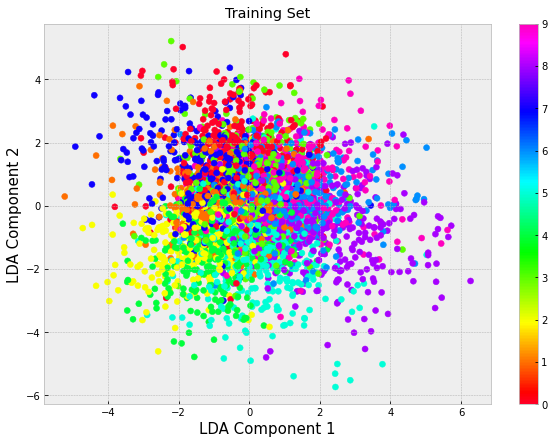

In [ ]:
lda = LDA(n_components=2)

ylda = lda.fit_transform(X_train_prep, t_train)

plt.figure(figsize=(10,7))
plt.scatter(ylda[:,0], ylda[:,1], c=t_train, cmap=plt.cm.gist_rainbow)
plt.xlabel('LDA Component 1', size=15)
plt.ylabel('LDA Component 2', size=15)
plt.title('Training Set')
plt.colorbar();

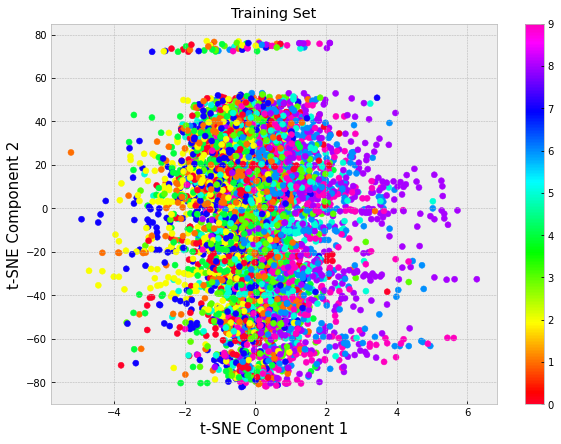

In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)

ytsne = tsne.fit_transform(X_train_prep, t_train)

plt.figure(figsize=(10,7))
plt.scatter(ylda[:,0], ytsne[:,1], c=t_train, cmap=plt.cm.gist_rainbow)
plt.xlabel('t-SNE Component 1', size=15)
plt.ylabel('t-SNE Component 2', size=15)
plt.title('Training Set')
plt.colorbar();

Based on LDA I would select 4 features, however with t-SNE I would select 40 features.

In [ ]:
pca = PCA(n_components=2)

ypca = pca.fit_transform(X_train_prep)

ypca.shape

(6720, 2)

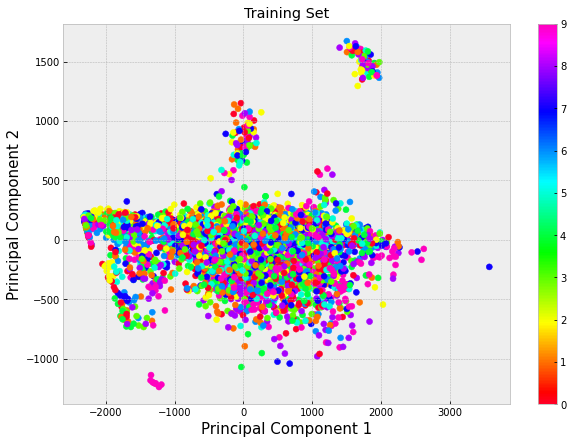

In [ ]:
plt.figure(figsize=(10,7))
plt.scatter(ypca[:,0], ypca[:,1], c=t_train, cmap=plt.cm.gist_rainbow)
plt.xlabel('Principal Component 1', size=15)
plt.ylabel('Principal Component 2', size=15)
plt.title('Training Set')
plt.colorbar();

PCA seems to cluster a majority of the training samples near the center, it would appear that it is having a hard time making distringuishments between characters in a reduced dimensionality set.

Manifold Learning

Text(0.5, 1.0, 'ISOMAP')

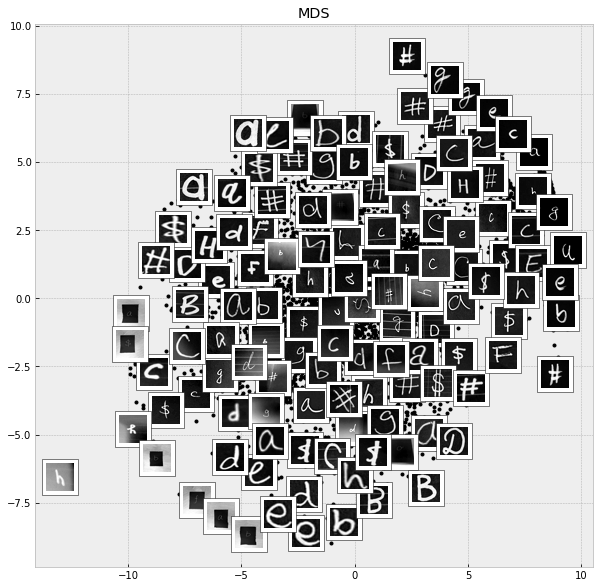

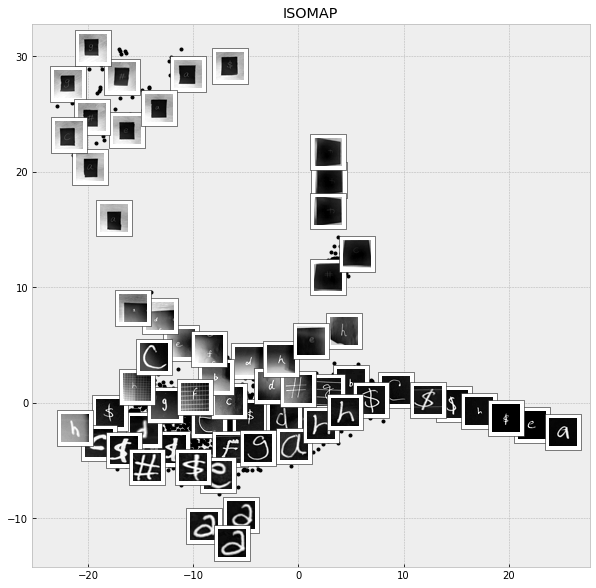

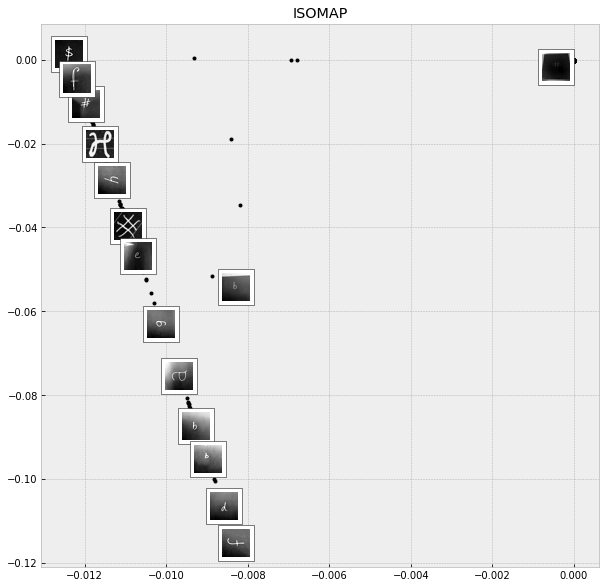

In [ ]:
from sklearn.manifold import Isomap
from sklearn.manifold import LocallyLinearEmbedding as LLE
from sklearn.manifold import MDS
from matplotlib import offsetbox
def plot_components(data, model, images=None, ax=None,
                    thumb_frac=0.05, cmap='gray'):
    ax = ax or plt.gca()

    proj = model.fit_transform(data)
    ax.plot(proj[:, 0], proj[:, 1], '.k')

    if images is not None:
        min_dist_2 = (thumb_frac * max(proj.max(0) - proj.min(0))) ** 2
        shown_images = np.array([2 * proj.max(0)])
        for i in range(data.shape[0]):
            dist = np.sum((proj[i] - shown_images) ** 2, 1)
            if np.min(dist) < min_dist_2:
                # don't show points that are too close
                continue
            shown_images = np.vstack([shown_images, proj[i]])
            imagebox = offsetbox.AnnotationBbox(
                offsetbox.OffsetImage(images[i], cmap=cmap),
                                      proj[i])
            ax.add_artist(imagebox)

#MDS
# t0 = time()
model = MDS(n_components=2)
# proj = model.fit_transform(X_train)
# t1 = time()
# print("MDS: %.2g sec" % (t1 - t0))
# print(model.embedding_)
fig, ax = plt.subplots(figsize=(10, 10))
plot_components(X_train_scaled, model, images=X_train_prep.reshape((-1,28,28)),
                ax=ax, thumb_frac=0.05, cmap='gray_r')
plt.title('MDS')

# IsoMap
# t0 = time()
model = Isomap(n_components=2)
# proj = model.fit_transform(X_train)
# t1 = time()
# print("ISOMAP: %.2g sec" % (t1 - t0))
# print(model.embedding_)
fig, ax = plt.subplots(figsize=(10, 10))
plot_components(X_train_scaled, model, images=X_train_prep.reshape((-1,28,28)),
                ax=ax, thumb_frac=0.05, cmap='gray_r')
plt.title('ISOMAP')

# LLE
# t0 = time()
model = LLE(n_components=2, n_neighbors=5)
# proj = model.fit_transform(X_train)
# t1 = time()
# print("LLE: %.2g sec" % (t1 - t0))
# print(model.embedding_)
fig, ax = plt.subplots(figsize=(10, 10))
plot_components(X_train_scaled, model, images=X_train_prep.reshape((-1,28,28)),
                ax=ax, thumb_frac=0.05, cmap='gray_r')
plt.title('LLE')

After the above outputs, I would select LLE as it appears to do the best job at distinguishing the different characters from each other.

In [ ]:
pipe_manifold = Pipeline(steps=[('LLE', Isomap(n_components=3)),
                      ('SVM', SVC(kernel='rbf'))])

In [ ]:
param_grid = {
    'LLE__n_components': [3,4,5,6]
}

grid_pipe_manifold = GridSearchCV(pipe_manifold,
                         param_grid=param_grid,
                         cv=5,
                         scoring='neg_mean_squared_error',
                         refit=True,
                         n_jobs=-1)

grid_pipe_manifold.fit(X_train_scaled,t_train)
final_model3 = grid_pipe_manifold.best_estimator_

In [ ]:
joblib.dump(final_model3, 'grid_pipe_manifold.pkl')

['grid_pipe_manifold.pkl']

In [ ]:

scores = cross_val_score(final_model3, X_train_scaled, t_train,
                        scoring='accuracy',
                        cv=5)

confidence = 0.95
stats.t.interval(confidence,
                 len(scores)-1,
                 loc = scores.mean(),
                 scale=scores.std(ddof=1)/np.sqrt(len(scores)))

(0.1182503341693699, 0.14157109440205862)

In [ ]:
y_train = final_model3.predict(X_train_scaled)
print('Accuracy in Training:', accuracy_score(t_train, y_train)*100,'%\n')

Accuracy in Training: 15.089285714285714 %

